In [53]:
from google.colab import drive
drive.mount('/content/drive')

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Fatal error from Anvil server: Incorrect uplink key
Anvil websocket closed (code 1000, reason=b'')
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import string
import numpy as np
import pandas as pd
from numpy import array
from pickle import load

from PIL import Image
import pickle
from collections import Counter
import matplotlib.pyplot as plt

import sys, time, os, warnings
warnings.filterwarnings("ignore")
import re
import matplotlib
from matplotlib import pyplot
import matplotlib.font_manager as fm
import keras
import tensorflow as tf
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu

from keras_preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
# from keras.layers.merge import add
from tensorflow.keras.layers import add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image
import urllib.request
!pip install bnlp
!pip install -U bnlp_toolkit
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Fatal error from Anvil server: Incorrect uplink key
Anvil websocket closed (code 1000, reason=b'')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Fatal error from Anvil server: Incorrect uplink key
Anvil websocket closed (code 1000, reason=b'')
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [109]:
image_path = "/content/drive/MyDrive/BanglaLekhaCaptionDataSet/pure/images"
dir_Flickr_text = "/content/drive/MyDrive/BanglaLekhaCaptionDataSet/banglaCaption-manually-modified.txt"
jpgs = os.listdir(image_path)

print("Total Images in Dataset = {}".format(len(jpgs)))

Total Images in Dataset = 18308


In [110]:
file = open(dir_Flickr_text,'r')
text = file.read()
file.close()

datatxt = []
for line in text.split('\n'):
    col = line.split('\t')
    datatxt.append(col)
data = pd.DataFrame(datatxt, columns=['index', 'filename', 'caption'])
# data = data[data.filename != '2387.png.1']
uni_filenames = np.unique(data.filename.values)
data.head(10)

,index,filename,caption
0,0,1.png,তিন জন মেয়ে মানুষ আছে। এক জন দাড়িয়ে আছে আর দুই...
1,1,1.png,একটি হলুদ জামা পায়জামা পরা মহিলা দাড়িয়ে হাতে এ...
2,0,2.png,জলাশয় এ একজন ছেলে মানুষ ও একটি বাচ্চা মানুষ আছ...
3,1,2.png,দুই জন মানুষ যার একজন পুরুষ একটি নৌকায় দাড়িয়ে ...
4,0,3.png,অনেক মেয়ে মানুষ বসে আছে।
5,1,3.png,একটি নীল জামা পরা মহিলা একটি নীল ল্যাপটপ এর দি...
6,0,4.png,অনেক মানুষ একসাথে বসে কাজ করছে।
7,1,4.png,দুই টি ছোট ছেলে এক জন শার্ট প্যান্ট দাড়িয়ে চ...
8,0,5.png,ছয় জন মানুষ দাড়িয়ে আছে।
9,1,5.png,"ছয় জন মানুষ এলোমেলো দাড়িয়ে আছে, তাদের মাঝে দুই..."


In [111]:
def change_matplotlib_font(font_download_url):
    print(font_download_url)
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    print(font_files)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    print(font_name)
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

In [112]:
# font_download_url = "https://fonts.google.com/download?family=Tiro%20Bangla"
font_download_url = "http://banglafont.com/download/fonts/Download%20Kalpurush/Kalpurush.zip"
change_matplotlib_font(font_download_url)

http://banglafont.com/download/fonts/Download%20Kalpurush/Kalpurush.zip
['/content/MY_FONT/Kalpurush.ttf']
Kalpurush
font family:  ['Kalpurush']


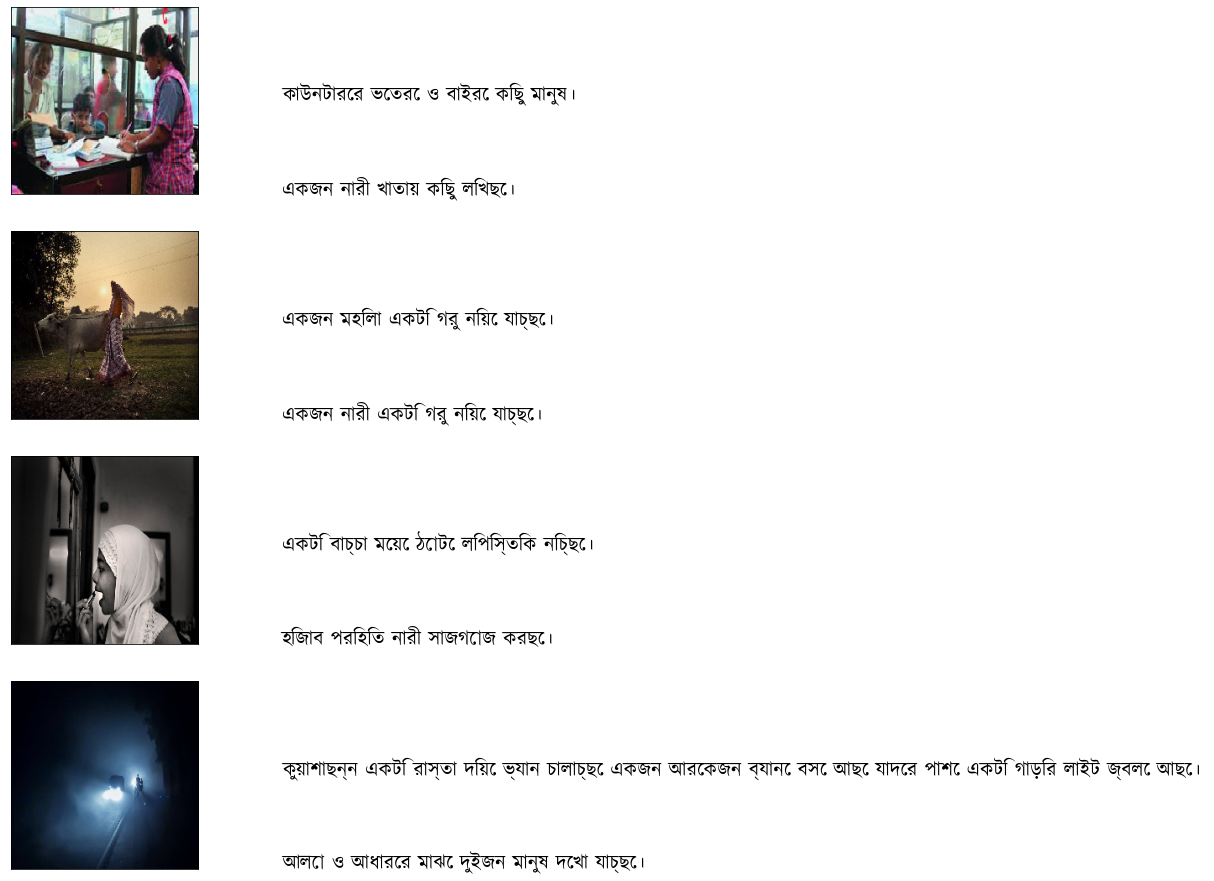

In [113]:
npic = 5
npix = 224
target_size = (npix,npix,3)
count = 1

fig = plt.figure(figsize=(10,20))

for jpgfnm in uni_filenames[10:14]:
  filename = image_path + '/' +jpgfnm
  captions = list(data["caption"].loc[data["filename"]==jpgfnm].values)
  image_load = load_img(filename, target_size=target_size)
  ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
  ax.imshow(image_load)
  count += 1

  ax = fig.add_subplot(npic,2,count)
  plt.axis('off')
  ax.plot()
  ax.set_xlim(0,1)
  ax.set_ylim(0,len(captions))
  for i, caption in enumerate(captions):
      ax.text(0,i,caption,fontsize=20)
  count += 1
plt.show()

In [114]:
# npic = 5
# npix = 224
# target_size = (npix,npix,3)
# count = 1

# fig = plt.figure(figsize=(10,20))
# for jpgfnm in uni_filenames[10:14]:
#    filename = image_path + '/' + jpgfnm
#    captions = list(data["caption"].loc[data["filename"]==jpgfnm].values)
#    image_load = load_img(filename, target_size=target_size)
#    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
#    ax.imshow(image_load)
#    count += 1

#    ax = fig.add_subplot(npic,2,count)
#    plt.axis('off')
#    ax.plot()
#    ax.set_xlim(0,1)
#    ax.set_ylim(0,len(captions))
#    for i, caption in enumerate(captions):
#        ax.text(0,i,caption,fontsize=20)
#    count += 1
# plt.show()

In [115]:
vocabulary = []
for txt in data.caption.values:
   vocabulary.extend(txt.split())
print('Vocabulary Size: %d' % len(set(vocabulary)))

Vocabulary Size: 5965


In [116]:
def cleanCaption(caption):
  whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
  bangla_fullstop = u"\u0964"
  punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
  punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
  numeric = u"[১২৩৪৫৬৭৮৯০]"
  caption= whitespace.sub(" ",caption).strip()
  caption = re.sub(punctSeq, " ", caption)
  caption = re.sub(bangla_fullstop, " ",caption)
  caption = re.sub(punc, " ", caption)
  caption = re.sub(numeric, " ", caption)
  return caption

for i, caption in enumerate(data.caption.values):
  newcaption = cleanCaption(caption)
  data["caption"].iloc[i] = newcaption

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Fatal error from Anvil server: Incorrect uplink key
Anvil websocket closed (code 1000, reason=b'')


In [117]:
clean_vocabulary = []
for txt in data.caption.values:
   clean_vocabulary.extend(txt.split())
print('Clean Vocabulary Size: %d' % len(set(clean_vocabulary)))

Clean Vocabulary Size: 5120


In [118]:
PATH = "/content/drive/MyDrive/BanglaLekhaCaptionDataSet/pure/images/"
all_captions = []
for caption  in data["caption"]:
  caption = '<start> ' + caption+ ' <end>'
  all_captions.append(caption)

print(len(all_captions))

18308


In [119]:
all_img_name_vector = []
for annot in data["filename"]:
   full_image_path = PATH + annot
   all_img_name_vector.append(full_image_path)

In [120]:
print(f"len(all_img_name_vector) : {len(all_img_name_vector)}")
print(f"len(all_captions) : {len(all_captions)}")

len(all_img_name_vector) : 18308
len(all_captions) : 18308


In [121]:
def data_limiter(num,total_captions,all_img_name_vector):
  train_captions, img_name_vector = shuffle(total_captions,all_img_name_vector,random_state=1)
  train_captions = train_captions[:num]
  img_name_vector = img_name_vector[:num]
  print(len(train_captions))
  print(len(img_name_vector))
  return train_captions,img_name_vector

train_captions,img_name_vector = data_limiter(18304,all_captions,all_img_name_vector)

18304
18304


In [122]:
image_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

image_features_extract_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [123]:
def load_image(image_path):
   img = tf.io.read_file(image_path)
   img = tf.image.decode_jpeg(img, channels=3)
   img = tf.image.resize(img, (224, 224))
   img = preprocess_input(img)
   return img, image_path

In [124]:
encode_train = sorted(set(img_name_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
print(len(image_dataset))
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)
print(len(image_dataset))

9154
144


In [125]:
# for img, path in tqdm(image_dataset):
#  batch_features = image_features_extract_model(img)
#  batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
#  for bf, p in zip(batch_features, path):
#    path_of_feature = p.numpy().decode("utf-8")
#    np.save(path_of_feature, bf.numpy())

In [126]:
top_k = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                 oov_token="<unk>",
                                                 filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

tokenizer.fit_on_texts(train_captions)
train_seqs = tokenizer.texts_to_sequences(train_captions)
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(train_captions)
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink


In [127]:
train_captions[:3]

['<start> একজন ছেলে নৌকায় বসে মোবাইল দিয়ে সেলফি তুলছে  <end>',
 '<start> অনেকগুলো শিশু হাততালি দিচ্ছে  <end>',
 '<start> তিনজন নারী নৃত্য করছে  পিছনে অনেকগুলো মানুষ আছে  <end>']

In [128]:
def calc_max_length(tensor):
   return max(len(t) for t in tensor)
max_length = calc_max_length(train_seqs)

def calc_min_length(tensor):
   return min(len(t) for t in tensor)
min_length = calc_min_length(train_seqs)

print('Max Length of any caption : Min Length of any caption = '+ str(max_length) +" : "+str(min_length))

Max Length of any caption : Min Length of any caption = 40 : 3


In [129]:
img_name_train, img_name_val, cap_train, cap_val = train_test_split(img_name_vector,cap_vector, test_size=0.2307692, random_state=0)

In [130]:
# print(len(img_name_train))
# print(len(img_name_val))
# print(img_name_train[0])
# print(cap_train[0])

In [131]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = len(tokenizer.word_index) + 1
num_steps = len(img_name_train) // BATCH_SIZE
features_shape = 512
attention_features_shape = 49
predicted_sentence_len = 30
print(vocab_size)

5124


In [132]:
def map_func(img_name, cap):
 img_tensor = np.load(img_name.decode('utf-8')+'.npy')
 return img_tensor, cap
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
        map_func, [item1, item2], [tf.float32, tf.int32]),
         num_parallel_calls=tf.data.experimental.AUTOTUNE)

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [133]:
# print(len(dataset)) # 220*64 = 14080 ==training dataset size

In [134]:
#NEW
class VGG16_Encoder(tf.keras.Model):
   def __init__(self, embedding_dim):
       super(VGG16_Encoder, self).__init__()
       self.fc = tf.keras.layers.Dense(embedding_dim)
       self.dropout = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None)

   def call(self, x):
       #x= self.dropout(x)
       x = self.fc(x)
       x = tf.nn.relu(x)
       return x  

In [135]:
def rnn_type(units):
  if tf.test.is_gpu_available():
    return tf.compat.v1.keras.layers.CuDNNLSTM(units,
                                    return_sequences=True,
                                    return_state=True,
                                    recurrent_initializer='glorot_uniform')
  else:
    return tf.keras.layers.GRU(units,
                              return_sequences=True,
                              return_state=True,
                              recurrent_activation='sigmoid',
                              recurrent_initializer='glorot_uniform')

In [136]:
'''The encoder output(i.e. 'features'), hidden state(initialized to 0)(i.e. 'hidden') and
the decoder input (which is the start token)(i.e. 'x') is passed to the decoder.'''

class Rnn_Local_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(Rnn_Local_Decoder, self).__init__()
    self.units = units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                  return_sequences=True,
                                  return_state=True,
                                  recurrent_initializer='glorot_uniform')

    self.fc1 = tf.keras.layers.Dense(self.units)

    self.dropout = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None)
    self.batchnormalization = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

    self.fc2 = tf.keras.layers.Dense(vocab_size)

    # Implementing Attention Mechanism
    self.Uattn = tf.keras.layers.Dense(units)
    self.Wattn = tf.keras.layers.Dense(units)
    self.Vattn = tf.keras.layers.Dense(1)

  def call(self, x, features, hidden):
    # features shape ==> (64,49,256) ==> Output from ENCODER
    # hidden shape == (batch_size, hidden_size) ==>(64,512)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size) ==> (64,1,512)

    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # score shape == (64, 49, 1)
    # Attention Function
    '''e(ij) = f(s(t-1),h(j))'''
    ''' e(ij) = Vattn(T)*tanh(Uattn * h(j) + Wattn * s(t))'''

    score = self.Vattn(tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis)))

    # self.Uattn(features) : (64,49,512)
    # self.Wattn(hidden_with_time_axis) : (64,1,512)
    # tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis)) : (64,49,512)
    # self.Vattn(tf.nn.tanh(self.Uattn(features) + self.Wattn(hidden_with_time_axis))) : (64,49,1) ==> score

    # you get 1 at the last axis because you are applying score to self.Vattn
    # Then find Probability using Softmax
    '''attention_weights(alpha(ij)) = softmax(e(ij))'''

    attention_weights = tf.nn.softmax(score, axis=1)

    # attention_weights shape == (64, 49, 1)
    # Give weights to the different pixels in the image
    ''' C(t) = Summation(j=1 to T) (attention_weights * VGG-16 features) '''

    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    # Context Vector(64,256) = AttentionWeights(64,49,1) * features(64,49,256)
    # context_vector shape after sum == (64, 256)
    # x shape after passing through embedding == (64, 1, 256)

    x = self.embedding(x)
    # x shape after concatenation == (64, 1,  512)

    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
    # passing the concatenated vector to the GRU

    output, state = self.gru(x)
    # shape == (batch_size, max_length, hidden_size)

    x = self.fc1(output)
    # x shape == (batch_size * max_length, hidden_size)

    x = tf.reshape(x, (-1, x.shape[2]))

    # Adding Dropout and BatchNorm Layers
    x= self.dropout(x)
    x= self.batchnormalization(x)

    # output shape == (64 * 512)
    x = self.fc2(x)

    # shape : (64 * 8329(vocab))
    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))


encoder = VGG16_Encoder(embedding_dim)
decoder = Rnn_Local_Decoder(embedding_dim, units, vocab_size)

Anvil websocket open


In [137]:
print(tf.test.is_gpu_available())

True


In [138]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
   from_logits=True, reduction='none')

def loss_function(real, pred):
 mask = tf.math.logical_not(tf.math.equal(real, 0))
 loss_ = loss_object(real, pred)
 mask = tf.cast(mask, dtype=loss_.dtype)
 loss_ *= mask

 return tf.reduce_mean(loss_)

In [139]:
loss_plot = []

@tf.function
def train_step(img_tensor, target):
 loss = 0
 # initializing the hidden state for each batch
 # because the captions are not related from image to image

 hidden = decoder.reset_state(batch_size=target.shape[0])
 dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

 with tf.GradientTape() as tape:
     features = encoder(img_tensor)
     for i in range(1, target.shape[1]):
         # passing the features through the decoder
         predictions, hidden, _ = decoder(dec_input, features, hidden)
         loss += loss_function(target[:, i], predictions)

         # using teacher forcing
         dec_input = tf.expand_dims(target[:, i], 1)

 total_loss = (loss / int(target.shape[1]))
 trainable_variables = encoder.trainable_variables + decoder.trainable_variables
 gradients = tape.gradient(loss, trainable_variables)
 optimizer.apply_gradients(zip(gradients, trainable_variables))

 return loss, total_loss

In [140]:
# #######################################
# %%time
# EPOCHS = 20
# for epoch in range(EPOCHS):
#    start = time.time()
#    total_loss = 0

#    for (batch, (img_tensor, target)) in enumerate(dataset):
#        batch_loss, t_loss = train_step(img_tensor, target)
#        total_loss += t_loss

#        if batch % 100 == 0:
#            print ('Epoch {} Batch {} Loss {:.4f}'.format(
#              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
#    # storing the epoch end loss value to plot later
#    loss_plot.append(total_loss / num_steps)

#    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
#                                         total_loss/num_steps))

#    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

In [141]:
checkpoint_directory = "/content/drive/MyDrive/BanglaLekhaCaptionDataSet/pure/documentation/training_checkpoints"
checkpoint_prefix = os.path.join(checkpoint_directory, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,decoder=decoder, encoder=encoder)
status = checkpoint.restore(tf.train.latest_checkpoint(checkpoint_directory))
# /content/drive/MyDrive/BanglaLekhaCaptionDataSet/pure/documentation/training_checkpoints/ckpt-1

In [142]:
# save_path = checkpoint.save(file_prefix=checkpoint_prefix)
# print(save_path)
# /content/drive/MyDrive/BanglaLekhaCaptionDataSet/pure/documentation/training_checkpoints/ckpt-1 --- 22 epoches

In [143]:
checkpoint.restore('/content/drive/MyDrive/BanglaLekhaCaptionDataSet/pure/documentation/training_checkpoints/ckpt-1')

In [144]:
# plt.plot(loss_plot)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Loss Plot')
# plt.show()
# print(loss_plot)

In [145]:
def evaluate(image):
  attention_plot = np.zeros((max_length, attention_features_shape))
  hidden = decoder.reset_state(batch_size=1)
  temp_input = tf.expand_dims(load_image(image)[0], 0)
  img_tensor_val = image_features_extract_model(temp_input)
  img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
  features = encoder(img_tensor_val)
  dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
  result = []
  for i in range(predicted_sentence_len): # max_length
      predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
      attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
      predicted_id = tf.argmax(predictions[0]).numpy()
      result.append(tokenizer.index_word[predicted_id])
      if tokenizer.index_word[predicted_id] == '<end>':
          return result, attention_plot
      dec_input = tf.expand_dims([predicted_id], 0)
  attention_plot = attention_plot[:len(result), :]
  return result, attention_plot

In [146]:
def plot_attention(image, result, attention_plot):
   temp_image = np.array(Image.open(image))
   fig = plt.figure(figsize=(10, 10))
   len_result = len(result)
   for l in range(len_result):
       temp_att = np.resize(attention_plot[l], (8, 8))
       ax = fig.add_subplot(len_result//2+1, len_result//2+1, l+1)
       ax.set_title(result[l])
       img = ax.imshow(temp_image)
       ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

   plt.tight_layout()
   plt.show()

In [147]:
def sentence_trim(a,attention_plot):
  modified_attention_plot=[]
  map = {}
  for i in a:
      if i in map:
          map[i]+=1;
      else:
          map[i] = 1;
          
  new_a=[]
  for i,word in enumerate(a):
      if map[word] <2:
        modified_attention_plot.append(attention_plot[i])
        new_a.append(word)
  return new_a,modified_attention_plot

In [148]:
def get_unique_word_sentence(a,attention_plot):
  modified_attention_plot=[]
  new_a=[]
  for i,word in enumerate(a):
    if new_a.count(word) <=0:
      modified_attention_plot.append(attention_plot[i])
      new_a.append(word)

  return new_a,modified_attention_plot

In [149]:
def similarity_check(real,predict):
  from bnlp import BengaliDoc2vec
  bn_doc2vec = BengaliDoc2vec()
  model_path = "/content/drive/MyDrive/BanglaLekhaCaptionDataSet/pure/Models/bangla_news_article_doc2vec.model"
  similarity = bn_doc2vec.get_document_similarity(
    model_path,
    real,
    predict
  )
  print("Similarity: ",similarity*100, "%")

2803
Fatal error from Anvil server: Incorrect uplink key
Anvil websocket closed (code 1000, reason=b'')
Predicted:  একটি ছেলে মানুষ যার মাঝে একটি বাঁশ বুঝায় করা মানুষ যার মাঝে একটি বাঁশ বুঝায় করা মানুষ যার মাঝে একটি বাঁশ বুঝায় করা মানুষ যার মাঝে একটি বাঁশ বুঝায় করা
Real Caption: সাকোর উপর দিয়ে একজন মানুষ যাচ্ছে
Prediction Caption: ছেলে
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Similarity:  57.99999999999999 %
Anvil websocket open
Fatal error from Anvil server: Incorrect uplink key
Anvil websocket closed (code 1000, reason=b'')


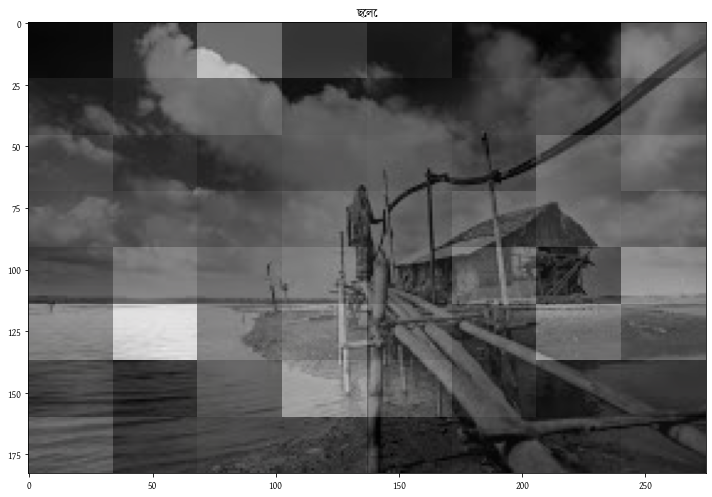

time took to Predict: 8 sec


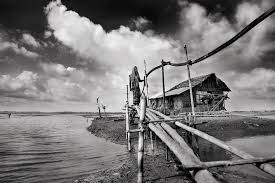

In [150]:
rid = np.random.randint(0, len(img_name_val))
# 687, 
print(rid)
image = img_name_val[rid]
start = time.time()
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)
if len(result) == predicted_sentence_len:
  print("Predicted: ",' '.join(result))
  result, attention_plot = sentence_trim(result,attention_plot)
  result_final = ' '.join(result)
else:
  #remove <end> from result        
  result_join = ' '.join(result)
  result_final = result_join.rsplit(' ', 1)[0]

first = real_caption.split(' ', 1)[1]
real_caption = first.rsplit(' ', 1)[0]
#remove "<unk>" in result
for i in result:
   if i=="<unk>":
       result.remove(i)

real_appn = []
real_appn.append(real_caption.split())
print ('Real Caption:', real_caption)
print ('Prediction Caption:', result_final)
similarity_check(real_caption,result_final)
plot_attention(image, result, attention_plot)
print(f"time took to Predict: {round(time.time()-start)} sec")
Image.open(img_name_val[rid])

In [151]:
# for i in range(50):
#   rid = np.random.randint(350, len(img_name_val))
#   # 687, 
#   # rid = count
#   print(rid)
#   image = img_name_val[rid]
#   start = time.time()
#   real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
#   result, attention_plot = evaluate(image)
#   if len(result) == predicted_sentence_len:
#     print("Predicted: ",' '.join(result))
#     result, attention_plot = sentence_trim(result,attention_plot)
#     result_final = ' '.join(result)
#   else:
#     #remove <end> from result        
#     result_join = ' '.join(result)
#     result_final = result_join.rsplit(' ', 1)[0]

#   first = real_caption.split(' ', 1)[1]
#   real_caption = first.rsplit(' ', 1)[0]
#   #remove "<unk>" in result
#   for i in result:
#     if i=="<unk>":
#         result.remove(i)
#   real_appn = []
#   real_appn.append(real_caption.split())
#   print ('Real Caption:', real_caption)
#   print ('Prediction Caption:', result_final)
#   similarity_check(real_caption,result_final)
#   plot_attention(image, result, attention_plot)
#   print(f"time took to Predict: {round(time.time()-start)} sec")
#   Image.open(img_name_val[rid])


In [152]:
def from_url(img_path):
  image = img_path
  start = time.time()
  result, attention_plot = evaluate(image)
  if len(result) == predicted_sentence_len:
    print("Predicted: ",' '.join(result))
    result, attention_plot = sentence_trim(result,attention_plot)
    result_final = ' '.join(result)
  else:
    #remove <end> from result        
    result_join = ' '.join(result)
    result_final = result_join.rsplit(' ', 1)[0]

  #remove "<unk>" in result
  for i in result:
    if i=="<unk>":
        result.remove(i)

  print ('Prediction Caption:', result_final)
  plot_attention(image, result, attention_plot)
  print(f"time took to Predict: {round(time.time()-start)} sec")

  Image.open(image)
  return result_final

In [153]:
def get_image_from_url(URL):
  with urllib.request.urlopen(URL) as url:
    with open('temporary.jpg', 'wb') as f:
      f.write(url.read())
    f.close()
  return from_url("/content/temporary.jpg")

Prediction Caption: রাস্তা দিয়ে হেটে আসছে


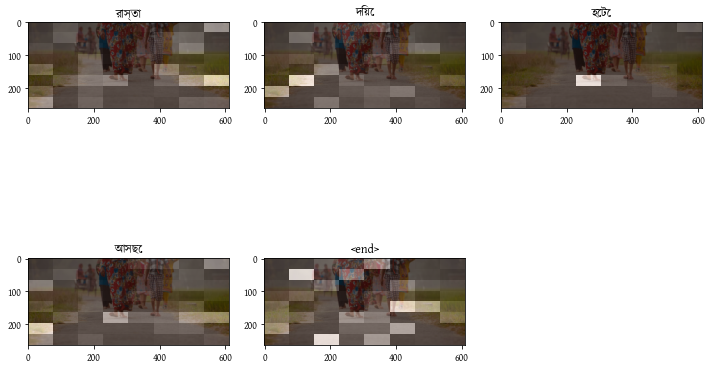

time took to Predict: 1 sec


'রাস্তা দিয়ে হেটে আসছে'

In [154]:
url = "https://media.istockphoto.com/id/1078595328/photo/women-walking-in-the-street-unique-photo.jpg?s=612x612&w=0&k=20&c=DZKHNFQuTbwvTSrwuoiBOvCMExYa6nRaWMJ8wrtNK3o="
get_image_from_url(url)

#Anvil

In [162]:
import anvil.server
from anvil import URLMedia
import anvil.media
anvil.server.connect("PECRYHBCBWYTHZNOCIGLY2F3-66EFFF4M4V6CLU47")

Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket closed (code 1000, reason=b'')
Anvil websocket open
Connected to "Default environment" as SERVER


In [163]:
def upload_image(str):
  image = str
  start = time.time()
  result, attention_plot = evaluate(image)
  if len(result) == predicted_sentence_len:
    print("Predicted: ",' '.join(result))
    result, attention_plot = sentence_trim(result,attention_plot)
    result_final = ' '.join(result)
  else:
    #remove <end> from result        
    result_join = ' '.join(result)
    result_final = result_join.rsplit(' ', 1)[0]

  #remove "<unk>" in result
  for i in result:
    if i=="<unk>":
        result.remove(i)

  print ('Prediction Caption:', result_final)
  plot_attention(image, result, attention_plot)
  print(f"time took to Predict: {round(time.time()-start)} sec")
  Image.open(image)
  return result_final

In [164]:

@anvil.server.callable
def anvil_caption_image_from_file(file):
  with anvil.media.TempFile(file) as filename:
    result = upload_image(filename)
    return result

@anvil.server.callable
def anvil_caption_image_from_url(url):
  return get_image_from_url(url)

@anvil.server.callable
def getimage(url):
  my_media = URLMedia(url)
  return my_media